In [4]:
from google.colab import files
uploaded=files.upload()

Saving StudentsPerformance.csv to StudentsPerformance.csv


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv("StudentsPerformance.csv")
df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [6]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


cleaning datasets

In [7]:
df.isnull().sum()


,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0


checking  duplicated values

In [8]:
df.duplicated().sum()


np.int64(0)

In [9]:
for col in ['gender','race/ethnicity','parental level of education','lunch','test preparation course']:
    print(col, df[col].unique())

gender ['female' 'male']
race/ethnicity ['group B' 'group C' 'group A' 'group D' 'group E']
parental level of education ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
lunch ['standard' 'free/reduced']
test preparation course ['none' 'completed']


In [10]:
df.columns=df.columns.str.replace(' ','_').str.lower()
df.columns



Index(['gender', 'race/ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')

In [11]:
#analyzsis of numerical columns
import numpy as np
numeric_cols=["math_score","reading_score","writing_score"]

for col in numeric_cols:
  print(f"\n --{col.upper()}--")
  print(f"Mean: {df[col].mean()}")
  print(f"Median: {df[col].median()}")
  print(f"Mode: {df[col].mode()}")
  print(f"Standard Deviation: {df[col].std()}")
  print(f"Variance: {df[col].var()}")
  print(f"min:",df[col].min())
  print(f"max:",df[col].max())
  print(f"Range: {df[col].max()-df[col].min()}")
  print(f"IQR: {np.percentile(df[col],75)-np.percentile(df[col],25)}")




 --MATH_SCORE--
Mean: 66.089
Median: 66.0
Mode: 0    65
Name: math_score, dtype: int64
Standard Deviation: 15.163080096009468
Variance: 229.91899799799847
min: 0
max: 100
Range: 100
IQR: 20.0

 --READING_SCORE--
Mean: 69.169
Median: 70.0
Mode: 0    72
Name: reading_score, dtype: int64
Standard Deviation: 14.60019193725222
Variance: 213.1656046046047
min: 17
max: 100
Range: 83
IQR: 20.0

 --WRITING_SCORE--
Mean: 68.054
Median: 69.0
Mode: 0    74
Name: writing_score, dtype: int64
Standard Deviation: 15.195657010869642
Variance: 230.90799199199168
min: 10
max: 100
Range: 90
IQR: 21.25


In [12]:
corr=df[["math_score","reading_score","writing_score"]].corr() #correlation between data
corr

,math_score,reading_score,writing_score
math_score,1.000000,0.817580,0.802642
reading_score,0.817580,1.000000,0.954598
writing_score,0.802642,0.954598,1.000000


In [13]:
corr.style.background_gradient(cmap='coolwarm')


,math_score,reading_score,writing_score
math_score,1.000000,0.817580,0.802642
reading_score,0.817580,1.000000,0.954598
writing_score,0.802642,0.954598,1.000000


In [14]:
#gender wise performance
df.groupby("gender")[["math_score","reading_score","writing_score"]].mean()

,math_score,reading_score,writing_score
gender,,,
female,63.633205,72.608108,72.467181
male,68.728216,65.473029,63.311203


In [15]:
#lunch type effect
df.groupby("lunch")[["math_score","reading_score","writing_score"]].mean()

,math_score,reading_score,writing_score
lunch,,,
free/reduced,58.921127,64.653521,63.022535
standard,70.034109,71.654264,70.823256


In [16]:
#effects of course for test preparations
df.groupby("test_preparation_course")[["math_score","reading_score","writing_score"]].mean()

,math_score,reading_score,writing_score
test_preparation_course,,,
completed,69.695531,73.893855,74.418994
none,64.077882,66.534268,64.504673


In [17]:
#influence of educated parents
df.groupby("parental_level_of_education")[["math_score","reading_score","writing_score"]].mean()

,math_score,reading_score,writing_score
parental_level_of_education,,,
associate's degree,67.882883,70.927928,69.896396
bachelor's degree,69.389831,73.000000,73.381356
high school,62.137755,64.704082,62.448980
master's degree,69.745763,75.372881,75.677966
some college,67.128319,69.460177,68.840708
some high school,63.497207,66.938547,64.888268


# **1.Introduction**
This project help us to analyse the performance of students across three subjects namely Math, Reading and Writing. The objective of this is to understand how different factors such as socioeconomy ,demography influence student outcomes.

Using EDA(Exploratory Data Analytics), our study identifies key performance trends , correlation between the subjects , and impact of different factors like parental education ,preparation for test and many other.



# **2.Dataset Information**
Our dataset contains information about 1000 students and their perfromance across three subjects : math , reading and writing. This dataset is one of the most popular kaggle datasets "StudentsPerformance" . This dataset is clean which means it has no duplicate or missing values which makes it suitable for direct analysis

# **3.Checking Data Cleanliness**
Data cleaning is the backbone of data analysis without proper cleaning our results will become inconsistent and inaccurate.

Factors considered while data cleaning


*   Missing values : checking columns with null values
*   Duplication : checking if the columns are duplicated

*   Data Type : Checking Numerical columns are correctly typed as integers and categorical columns as objects
*   Standardization : we replaced spaces in column name with underscores and coverted it to lower case to make it look cleaner  

As the dataset that no missing values and no duplications so we moved directly to the analysis






# **4. Univariate(one variable at a time) Analysis**
This part explain how each subject score is distributed and variablitiy.
##4.1 Math Score Analysis
- Mean : ~66
- Median : 66  
- Standard Deviation : 15.16
- IQR : 20
- **Interpretation :** Math scores are moderately distributed overall performance with noticeable variability.
IQR of 20 represents that middle 50% of students differ by 20 marks.

## 4.2 Reading Score Analysis
- Mean : ~69
- Median : 70
- Standard Deviation : 14.60
- IQR : 20
- **Interpretation :** Reading has the highest average score among all three subjects and as relatively consistent performance with lower variability than math.

## 4.3 Writing Score Analysis
- Mean : ~68
- Median : 69
- Standard Deviation : 15.19
- IQR : 21.25
- **Interpretation :** Writing performance is slightly lower than reading but follows a similar pattern. Variability is moderate with an IQR is 21.



# **5. Correlation Analysis**
Correlation analysis helps to determine how strongly the three subject scores are related.
## **Intrepretation**
- **Reading and writing have a very strong positive correlation(0.95) :** Students who score high reading almost always score high in writing. This reflects strong overlap in language, grammer, and comprehension skills.
- **Math is Strongly correlated with both reading(0.81) and writing(0.80) :**
This shows that students with good analytical and problem-solving ability expected to perform consistently across all subjects.
- **Overall :** Performance in one subject is strongly linked wih performance in the others.



# **6. Category-wise Analysis**
This part explores how demography and socioeconomy factors influence studnet performance

## 6.1 Gender-wise Performance

|Gender |Math |Reading |Writing |
|--|--|--|--|
|Female |63.63 |72.60 |72.47 |
|Male |68.72 |65.47 |63.31|

**Interpretation:**
- Male studnets perform better in Math by a margin of about 5 points.
- Female students significantly outperform males in Reading and Writing (7-9 point difference).
-Females show stronger verbal abilities, while males show stronger quantitative ability.

## 6.2 Lunch Type Effect(Socioeconomic Effect)

|Lunch Type |Math |Reading |Writing|
|--|--|--|--|
|Free/reduced |58.92 |64.65 |63.02|
|Standard |70.03 |71.65 |70.82|

**Interpretation:**
- Studnets with standard lunch consistently score 10-12 points higher in all subjetcs .
- Lunch type reflects socioeconomic status : Better nutrition and stability lead to better academic outcomes

## 6.3 Test Preparation Course Impact

|Test Prep|Math |Reading |Writing|
|--|--|--|--|
|completed|69.69 |73.89 |74.41|
|None |64.07 |66.53 |64.50|

**Intrepretation :**
- Completing the test preparation course boosts performance across all subjects.
- The largest improvement appears in reading and writing (7-10 Point increase).
- Test preparation courses clearly contribute to better exam readiness and confidence.

## 6.4 Parental Education Influence

| Parent Education | Math | Reading | Writing |
|--|--|--|--|
| Master's degree | 69.74 | 75.37 | 75.67 |
| Bachelor's degree| 69.39 | 73.00 | 73.38 |
| Associate's degree | 67.88 | 70.93 | 69.89 |
| Some college  | 67.13 | 69.46 | 68.84 |
| Some high school| 63.49 | 66.39 | 64.88 |
| High school | 62.13 | 64.70 | 62.44 |

**Interpretation:**
- Higher parental education leads to higher student performance.  
- Students with parents holding Master’s degrees achieve the best results across all subjects.  
- Students with parents who completed only high school score the lowest.  
- Educational background at home plays a key role in shaping academic outcomes.

In [1]:
import os
os.makedirs("Visuals",exist_ok=True)

In [2]:
import seaborn as sns

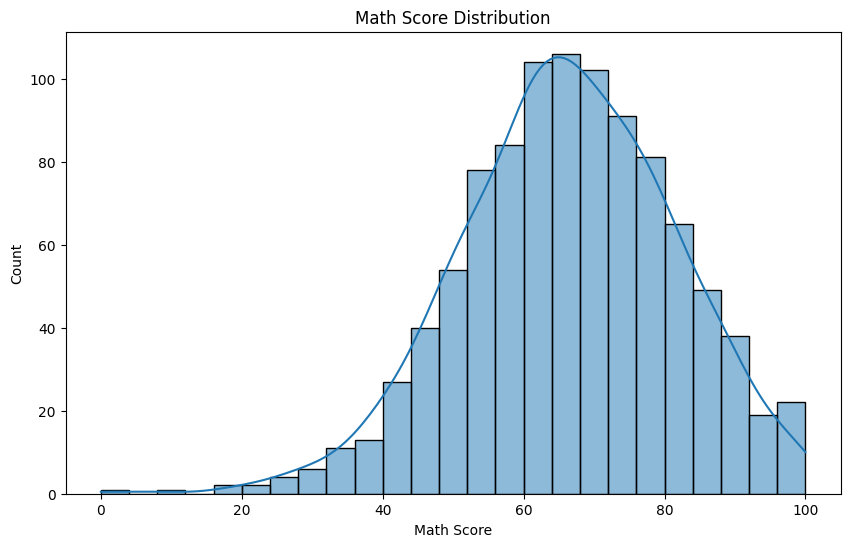

In [18]:
# Math Distribution
plt.figure(figsize=(10,6))
sns.histplot(df['math_score'], kde=True)
plt.title("Math Score Distribution")
plt.xlabel("Math Score")
plt.ylabel("Count")
plt.savefig("Visuals/math_distribution.png", dpi=300, bbox_inches='tight')
plt.show()



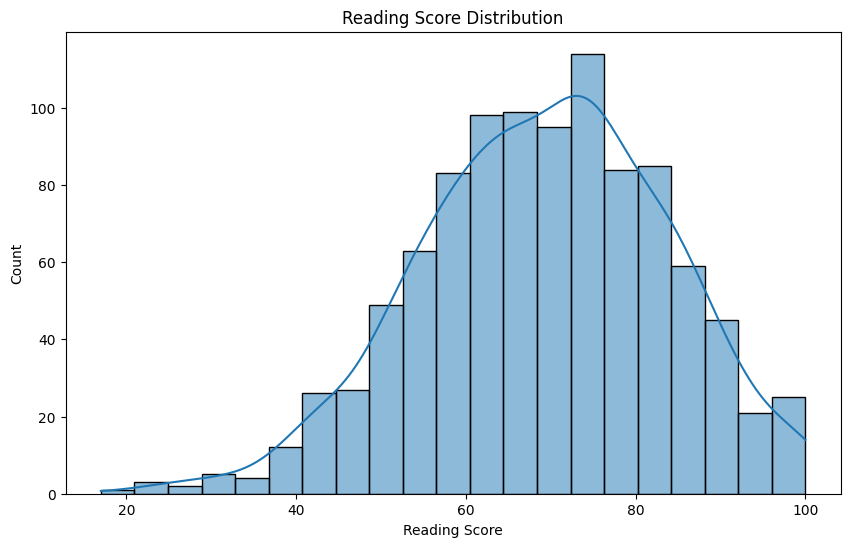

In [19]:
# Reading Distribution
plt.figure(figsize=(10,6))
sns.histplot(df['reading_score'], kde=True)
plt.title("Reading Score Distribution")
plt.xlabel("Reading Score")
plt.ylabel("Count")
plt.savefig("Visuals/reading_distribution.png", dpi=300, bbox_inches='tight')
plt.show()

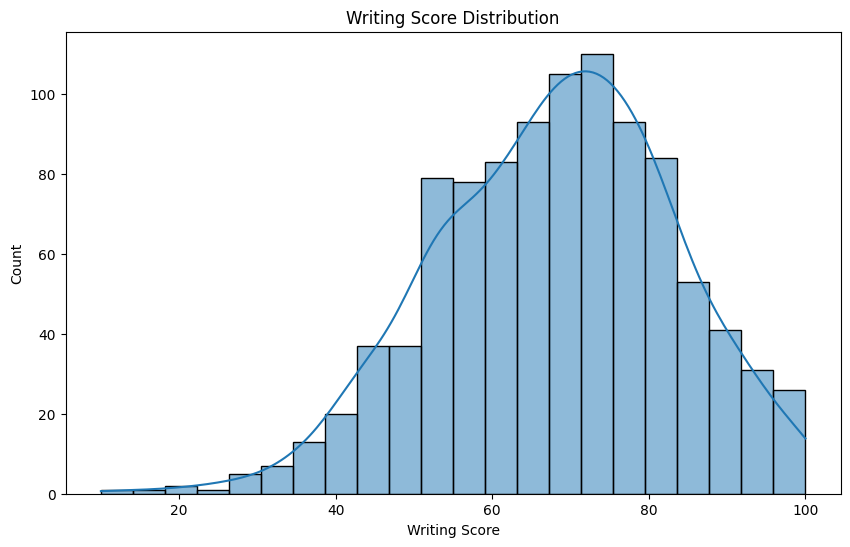

In [20]:
# Writing Distribution
plt.figure(figsize=(10,6))
sns.histplot(df['writing_score'], kde=True)
plt.title("Writing Score Distribution")
plt.xlabel("Writing Score")
plt.ylabel("Count")
plt.savefig("Visuals/writing_distribution.png", dpi=300, bbox_inches='tight')
plt.show()

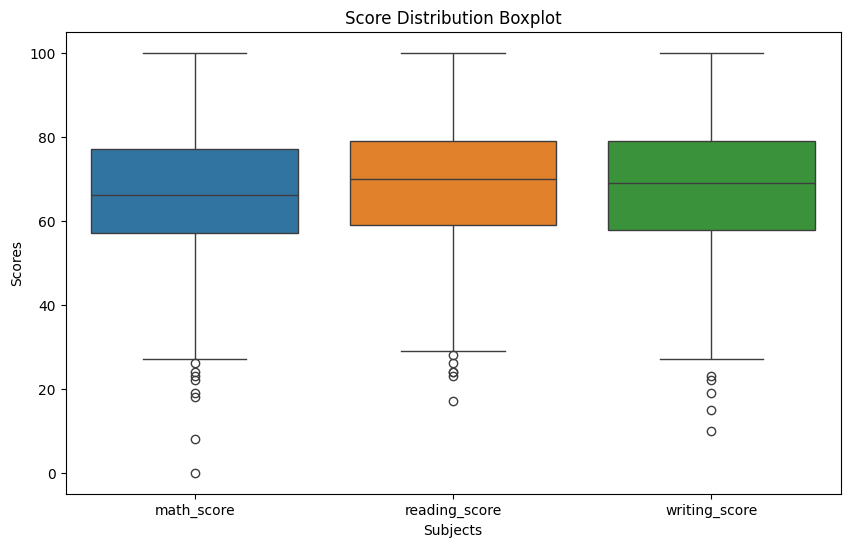

In [21]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df[['math_score', 'reading_score', 'writing_score']])
plt.title("Score Distribution Boxplot")
plt.xlabel("Subjects")
plt.ylabel("Scores")
plt.savefig("Visuals/Score_Distribution_Boxplot.png", dpi=300, bbox_inches='tight')

plt.show()

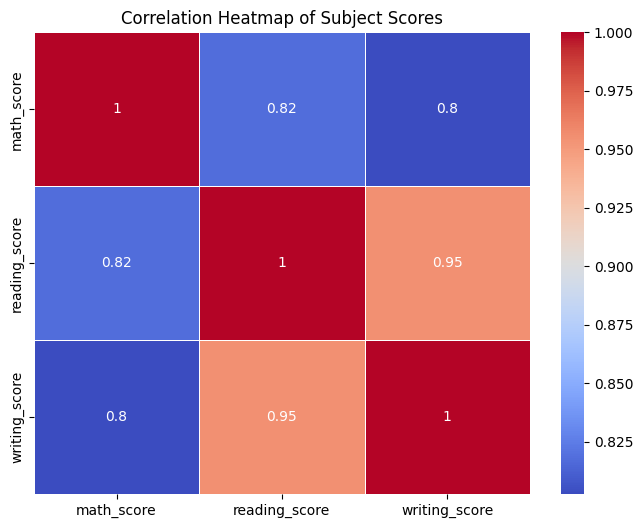

In [22]:
plt.figure(figsize=(8,6))
sns.heatmap(df[['math_score', 'reading_score', 'writing_score']].corr(),
            annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Subject Scores")
plt.savefig("Visuals/correlation_heatmap.png", dpi=300, bbox_inches='tight')

plt.show()

<Figure size 1000x600 with 0 Axes>

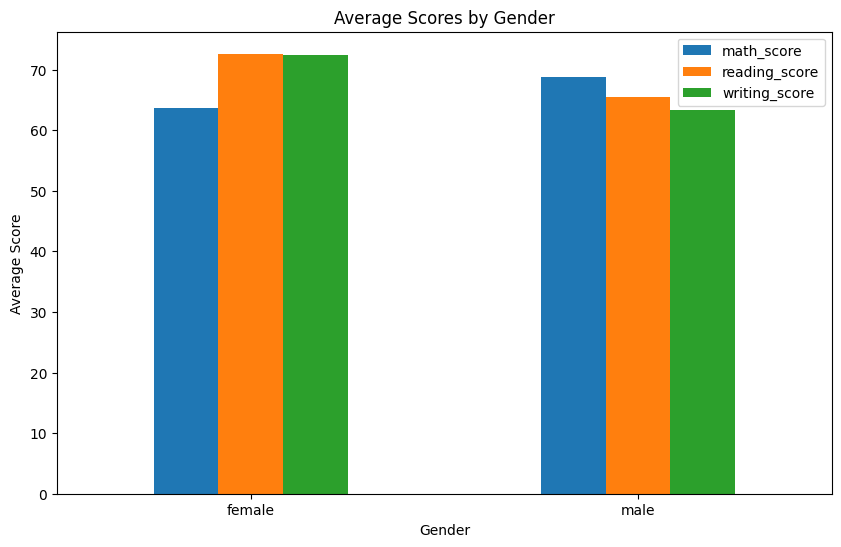

In [23]:
#Gender vs Average Score
plt.figure(figsize=(10,6))
gender_means = df.groupby("gender")[["math_score", "reading_score", "writing_score"]].mean()
gender_means.plot(kind="bar", figsize=(10,6))
plt.title("Average Scores by Gender")
plt.xlabel("Gender")
plt.ylabel("Average Score")
plt.xticks(rotation=0)
plt.savefig("Visuals/avg_score_by_gender.png", dpi=300, bbox_inches='tight')

plt.show()

<Figure size 1000x600 with 0 Axes>

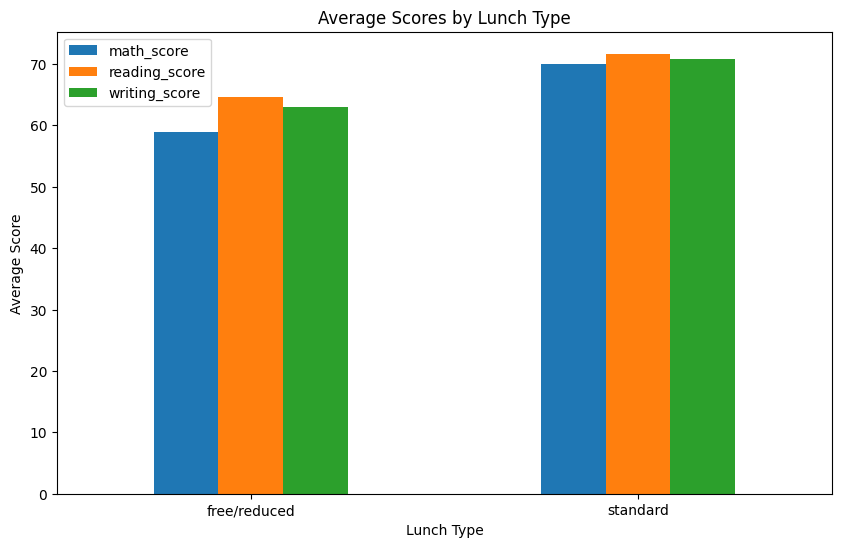

In [24]:
#Lunch types vs Average Score
plt.figure(figsize=(10,6))
lunch_means = df.groupby("lunch")[["math_score", "reading_score", "writing_score"]].mean()
lunch_means.plot(kind="bar", figsize=(10,6))
plt.title("Average Scores by Lunch Type")
plt.xlabel("Lunch Type")
plt.ylabel("Average Score")
plt.xticks(rotation=0)
plt.savefig("Visuals/avg_score_by_lunch_type.png", dpi=300, bbox_inches='tight')

plt.show()

<Figure size 1000x600 with 0 Axes>

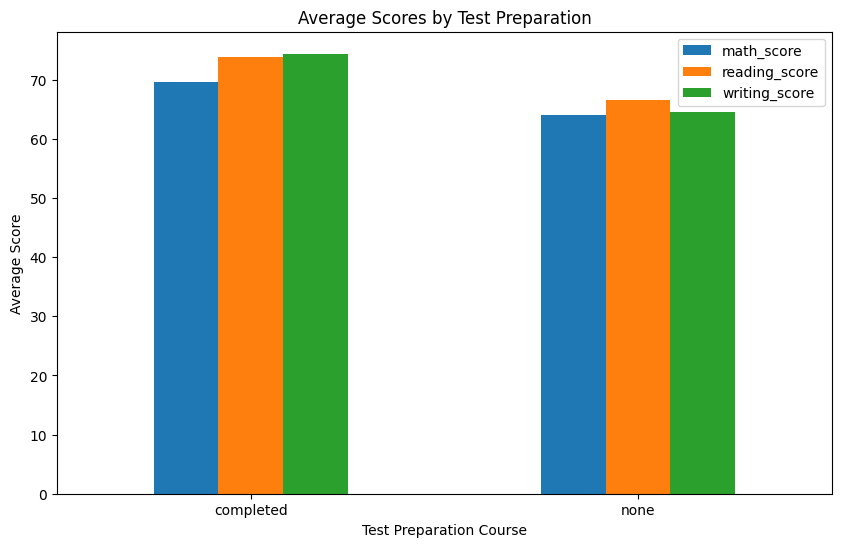

In [25]:
#Test Preparation vs Average Score
plt.figure(figsize=(10,6))
prep_means = df.groupby("test_preparation_course")[["math_score", "reading_score", "writing_score"]].mean()
prep_means.plot(kind="bar", figsize=(10,6))
plt.title("Average Scores by Test Preparation")
plt.xlabel("Test Preparation Course")
plt.ylabel("Average Score")
plt.xticks(rotation=0)
plt.savefig("Visuals/avg_score_by_Test_Prepartion.png", dpi=300, bbox_inches='tight')

plt.show()


<Figure size 1200x600 with 0 Axes>

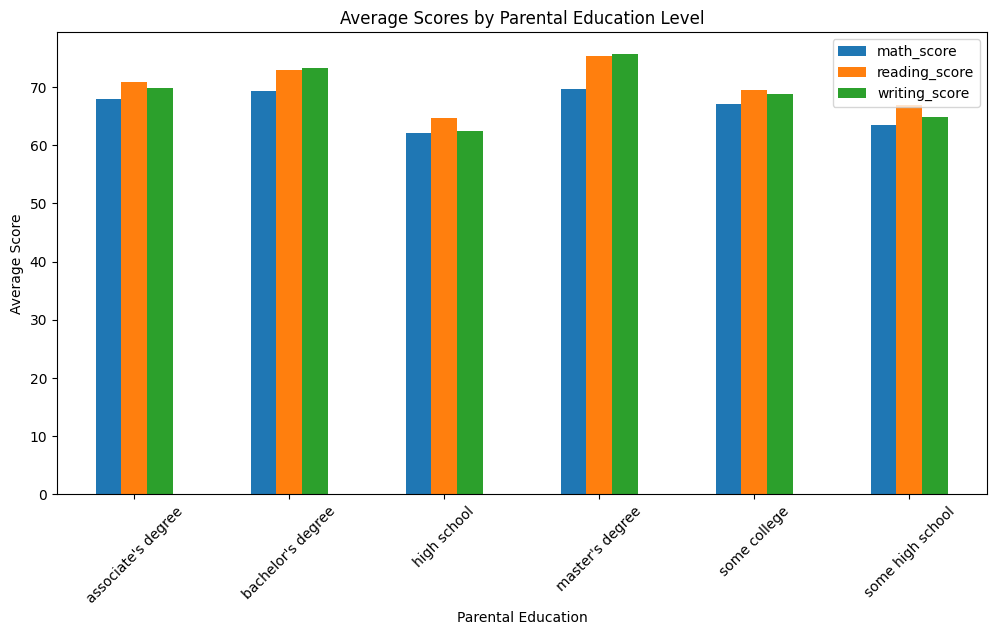

In [26]:
#parents education vs average score
plt.figure(figsize=(12,6))
parent_means = df.groupby("parental_level_of_education")[["math_score", "reading_score", "writing_score"]].mean()
parent_means.plot(kind="bar", figsize=(12,6))
plt.title("Average Scores by Parental Education Level")
plt.xlabel("Parental Education")
plt.ylabel("Average Score")
plt.xticks(rotation=45)
plt.savefig("Visuals/avg_score_by_parental_Education.png", dpi=300, bbox_inches='tight')

plt.show()

In [ ]:
df.to_csv("student_performance_cleaned.csv", index=False)

